In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import csv
from collections import OrderedDict

In [2]:
data = pd.read_csv('data/covid_numbers.csv')

In [3]:
#check if there is unwanterd columns ?
print(data.columns)
inp = input("is there any unwanted coumns ? (y/n)")
if inp == 'y':
    check = input('Is it Unnamed: 0 ?  (y/n)')
    if check == 'y':
        del data['Unnamed: 0']
        print('deleted')
    else :
        column_name =  input("Enter column name :")
        print('deleted')
        del data[column_name]
data.to_csv('data/covid_numbers.csv', index = True)

Index(['Unnamed: 0', 'srno', 'date', 'covid_cases', 'contact_cases',
       'patients_relieved', 'unknown_sources', 'Total_Active_Cases',
       'Death_rate'],
      dtype='object')
is there any unwanted coumns ? (y/n)y
Is it Unnamed: 0 ?  (y/n)y
deleted


In [4]:
data

,srno,date,covid_cases,contact_cases,patients_relieved,unknown_sources,Total_Active_Cases,Death_rate
0,1,04/08/2020,1083,902.0,1021,71.0,11543,3
1,2,05/08/2020,1195,971.0,1234,79.0,11495,7
2,3,06/08/2020,1298,1017.0,800,76.0,11986,3
3,4,07/08/2020,1251,1061.0,814,73.0,12414,5
4,5,08/08/2020,1420,1216.0,1715,92.0,12112,4
5,6,09/08/2020,1211,1026.0,970,103.0,12350,2
6,7,10/08/2020,1184,956.0,784,114.0,12740,7
7,8,11/08/2020,1417,1242.0,1426,105.0,12724,5
8,9,12/08/2020,1212,1068.0,880,45.0,13048,6
9,10,13/08/2020,1564,1380.0,766,98.0,13842,3


In [5]:
sample = data
continue_ = 'n'
continue_ = input("Do you have to update the data  : (y/n)")
while(continue_ =='y'):
    print(" Options !!")
    print("\tAdd Column : c \n\tAdd row values : r")
    op = input("Enter your option")
    if op == 'c' :
        print("-------------------")
        print("Adding column")
        print("-------------------")
        column_name = input("Enter Column name : ")
        column_length = len(sample)
        print("Enter your entries {0} :".format("must be length of  "),len(sample))
        column = []
        for i in range(column_length):
            value = input()
            column.append(value)
        sample[column_name] = np.array(column)
        print(sample)
        save = input("Do you want to save changes (y/n): ")
        if save == 'y' : 
            data = sample
        continue_ = input("do you want to add more : (y/n)")
    if op == 'r' :
        print("-------------------")
        print("Adding row values")
        print("-------------------")
        row = {}
        d=[]
        i=0
        for key in sample.columns:
            if i==1 :
                value = input("Enter {0}".format(key))
            else :
                value = int(input("Enter {0}".format(key)))
            row.update({key:value})
            i = i+1
        d.append(row)    
        sample = sample.append(d,True)
        print(sample)
        save = input("Do you want to save these changes (y/n): ")
        if save == 'y' : 
            data = sample
            print(data)
        continue_ = input("do you want to add more : (y/n)")
        
print("Final : ")
print(data)
final_save = input("Do you want to overwrite covid_numbers.csv : (y/n) ")
if final_save == 'y':
    data.to_csv('data/covid_numbers.csv', index = True)
    print("Successully saved data")
        
        
        
            
        
        
            
            
            

        
        

Do you have to update the data  : (y/n)y
 Options !!
	Add Column : c 
	Add row values : r
Enter your optionr
-------------------
Adding row values
-------------------
Enter srno44
Enter date16/09/2020
Enter covid_cases3830
Enter contact_cases3562
Enter patients_relieved2263
Enter unknown_sources350
Enter Total_Active_Cases32712
Enter Death_rate14
    srno        date  covid_cases  contact_cases  patients_relieved  \
0      1  04/08/2020         1083          902.0               1021   
1      2  05/08/2020         1195          971.0               1234   
2      3  06/08/2020         1298         1017.0                800   
3      4  07/08/2020         1251         1061.0                814   
4      5  08/08/2020         1420         1216.0               1715   
5      6  09/08/2020         1211         1026.0                970   
6      7  10/08/2020         1184          956.0                784   
7      8  11/08/2020         1417         1242.0               1426   
8      9  12

do you want to add more : (y/n)n
Final : 
    srno        date  covid_cases  contact_cases  patients_relieved  \
0      1  04/08/2020         1083          902.0               1021   
1      2  05/08/2020         1195          971.0               1234   
2      3  06/08/2020         1298         1017.0                800   
3      4  07/08/2020         1251         1061.0                814   
4      5  08/08/2020         1420         1216.0               1715   
5      6  09/08/2020         1211         1026.0                970   
6      7  10/08/2020         1184          956.0                784   
7      8  11/08/2020         1417         1242.0               1426   
8      9  12/08/2020         1212         1068.0                880   
9     10  13/08/2020         1564         1380.0                766   
10    11  14/08/2020         1569         1354.0               1304   
11    12  15/08/2020         1608         1409.0                803   
12    13  16/08/2020         1530  

In [6]:
data


,srno,date,covid_cases,contact_cases,patients_relieved,unknown_sources,Total_Active_Cases,Death_rate
0,1,04/08/2020,1083,902.0,1021,71.0,11543,3
1,2,05/08/2020,1195,971.0,1234,79.0,11495,7
2,3,06/08/2020,1298,1017.0,800,76.0,11986,3
3,4,07/08/2020,1251,1061.0,814,73.0,12414,5
4,5,08/08/2020,1420,1216.0,1715,92.0,12112,4
5,6,09/08/2020,1211,1026.0,970,103.0,12350,2
6,7,10/08/2020,1184,956.0,784,114.0,12740,7
7,8,11/08/2020,1417,1242.0,1426,105.0,12724,5
8,9,12/08/2020,1212,1068.0,880,45.0,13048,6
9,10,13/08/2020,1564,1380.0,766,98.0,13842,3


In [7]:
fieldnames = ('','srno', 'date', 'covid_cases', 'contact_cases', 'patients_relieved',
       'unknown_sources', 'Total_Active_Cases', 'Death_rate')

entries = []
#the with statement is better since it handles closing your file properly after usage.
with open('data/covid_numbers.csv', 'r') as csvfile:
    #python's standard dict is not guaranteeing any order, 
    #but if you write into an OrderedDict, order of write operations will be kept in output.
    reader = csv.DictReader(csvfile, fieldnames)
    for row in reader:
        entry = OrderedDict()
        for field in fieldnames:
            entry[field] = row[field]
        entries.append(entry)

output = {
    "Data": entries
}

with open('data/covid_numbers.json', 'w') as jsonfile:
    json.dump(output, jsonfile)
    jsonfile.write('\n')

In [8]:
data

,srno,date,covid_cases,contact_cases,patients_relieved,unknown_sources,Total_Active_Cases,Death_rate
0,1,04/08/2020,1083,902.0,1021,71.0,11543,3
1,2,05/08/2020,1195,971.0,1234,79.0,11495,7
2,3,06/08/2020,1298,1017.0,800,76.0,11986,3
3,4,07/08/2020,1251,1061.0,814,73.0,12414,5
4,5,08/08/2020,1420,1216.0,1715,92.0,12112,4
5,6,09/08/2020,1211,1026.0,970,103.0,12350,2
6,7,10/08/2020,1184,956.0,784,114.0,12740,7
7,8,11/08/2020,1417,1242.0,1426,105.0,12724,5
8,9,12/08/2020,1212,1068.0,880,45.0,13048,6
9,10,13/08/2020,1564,1380.0,766,98.0,13842,3


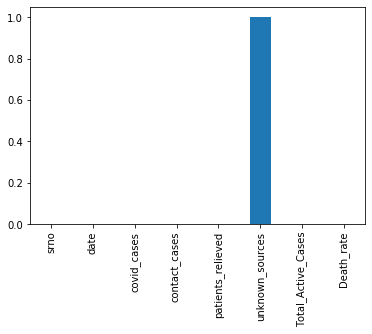

In [9]:
data.isna().sum().plot(kind='bar')


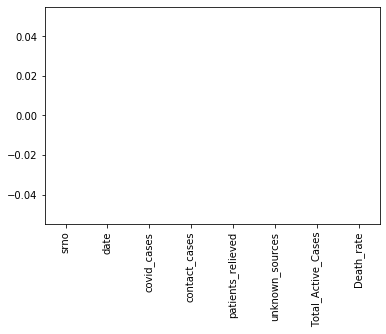

In [10]:
data['unknown_sources'].fillna(data['unknown_sources'].mean(),inplace=True)
data.isna().sum().plot(kind='bar')

In [11]:
data

,srno,date,covid_cases,contact_cases,patients_relieved,unknown_sources,Total_Active_Cases,Death_rate
0,1,04/08/2020,1083,902.0,1021,71.000000,11543,3
1,2,05/08/2020,1195,971.0,1234,79.000000,11495,7
2,3,06/08/2020,1298,1017.0,800,76.000000,11986,3
3,4,07/08/2020,1251,1061.0,814,73.000000,12414,5
4,5,08/08/2020,1420,1216.0,1715,92.000000,12112,4
5,6,09/08/2020,1211,1026.0,970,103.000000,12350,2
6,7,10/08/2020,1184,956.0,784,114.000000,12740,7
7,8,11/08/2020,1417,1242.0,1426,105.000000,12724,5
8,9,12/08/2020,1212,1068.0,880,45.000000,13048,6
9,10,13/08/2020,1564,1380.0,766,98.000000,13842,3


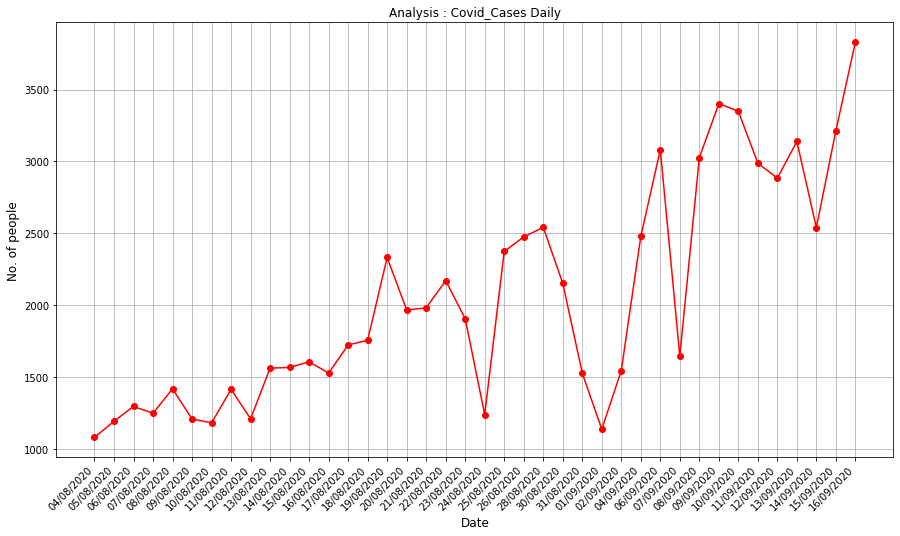

In [12]:
from matplotlib import cbook
fig_curve = plt.figure(figsize=(15,8))
#plt.imshow(image)
plt.plot(data['date'],data['covid_cases'],color='red',marker='o')
plt.xticks(rotation=45,ha='right')
plt.xlabel('Date',fontsize='large')
plt.ylabel('No. of people',fontsize='large')
plt.title('Analysis : Covid_Cases Daily')
plt.grid(True)
plt.show()

In [13]:
fig_curve.savefig('reports/Daily_Cases.png',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

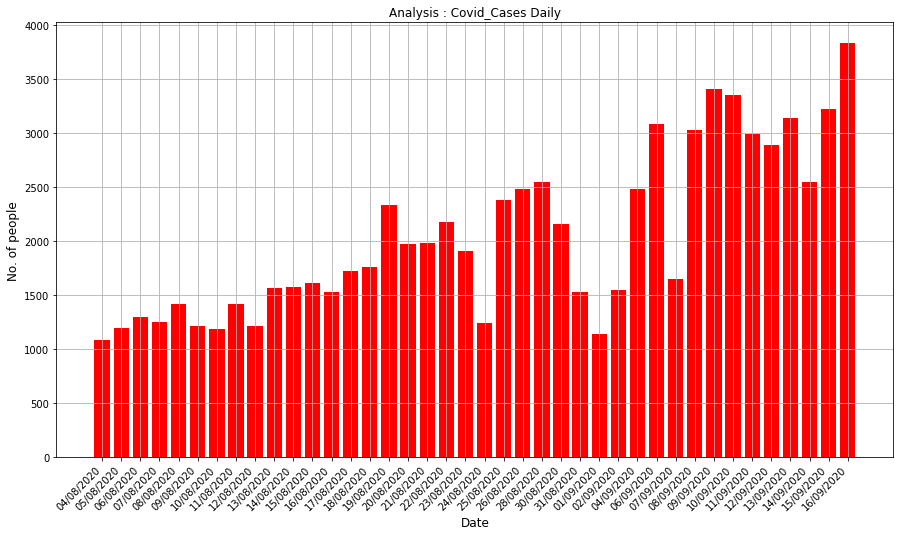

In [14]:
from matplotlib import cbook
fig_plot = plt.figure(figsize=(15,8))
plt.bar(data['date'],data['covid_cases'],color='red')
plt.xticks(rotation=45,ha='right')
plt.xlabel('Date',fontsize='large')
plt.ylabel('No. of people',fontsize='large')
plt.title('Analysis : Covid_Cases Daily')
plt.grid(True)
plt.show()

In [15]:
fig_plot.savefig('reports/Daily_Cases_bar.png',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

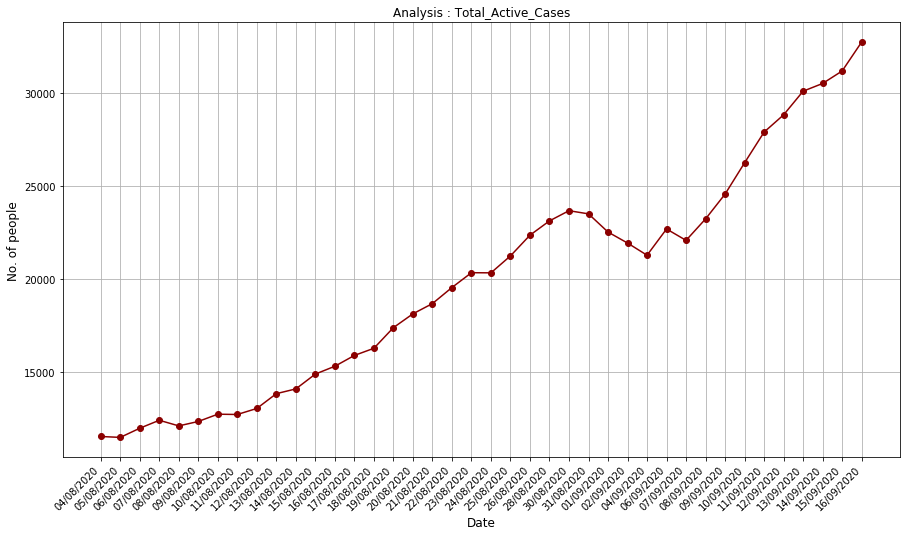

In [16]:

fig2 = plt.figure(figsize=(15,8))
plt.plot(data['date'],data['Total_Active_Cases'],color='darkred',marker='o')
plt.xticks(rotation=45,ha='right')
plt.xlabel('Date',fontsize='large')
plt.ylabel('No. of people',fontsize='large')
plt.title('Analysis : Total_Active_Cases')
plt.grid(True)
plt.show()

In [17]:
fig2.savefig('reports/TotalActiveCases.png',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

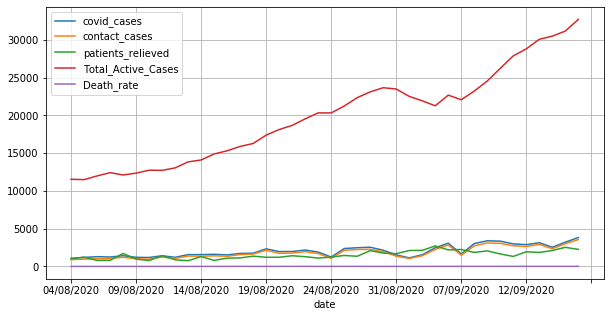

In [18]:
plot_data = data.iloc[:,[1,2,3,4,6,7]]
plot_data.set_index('date').plot(figsize=(10,5), grid=True)
plt.show()

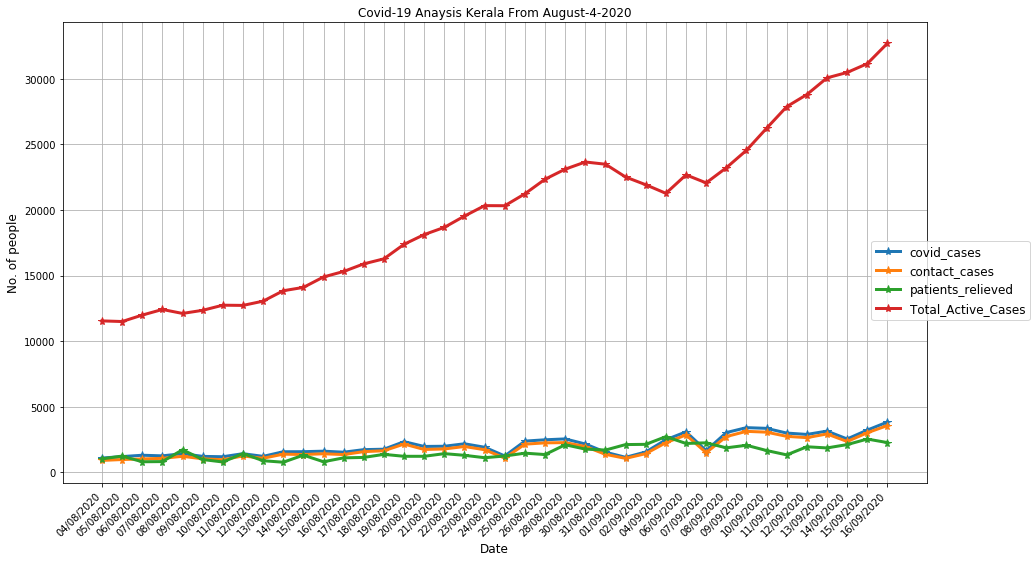

In [19]:
fig = plt.figure(figsize=(15,8))
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(data['date'],data[['covid_cases','contact_cases','patients_relieved','Total_Active_Cases']],'-*',linewidth=3, markersize=8)
plt.xticks(rotation=45,ha='right')
plt.title('Covid-19 Anaysis Kerala From August-4-2020')
plt.xlabel('Date',fontsize='large')
plt.ylabel('No. of people',fontsize='large')
plt.grid(True)
plt.figlegend(labels=('covid_cases','contact_cases','patients_relieved','Total_Active_Cases'),loc='center right',fontsize='large')
fig.savefig('reports/Overall.png')

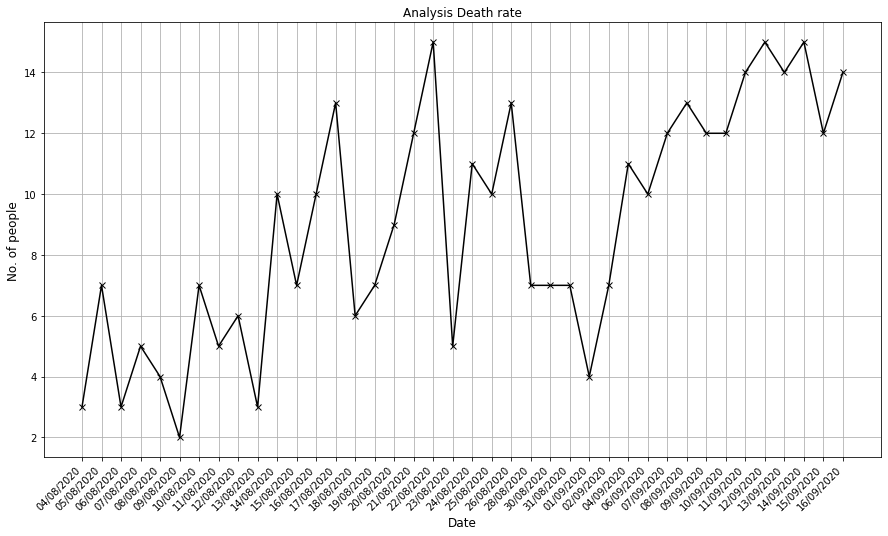

In [20]:
fig3 = plt.figure(figsize=(15,8))
plt.xlabel('Date',fontsize='large')
plt.ylabel('No. of people',fontsize='large')
plt.plot(data['date'],data['Death_rate'],color='black',marker='x')
plt.title('Analysis Death rate')
plt.xticks(rotation=45,ha='right')
plt.grid(True)
plt.show()

In [21]:
fig3.savefig('reports/Death_rate.png',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

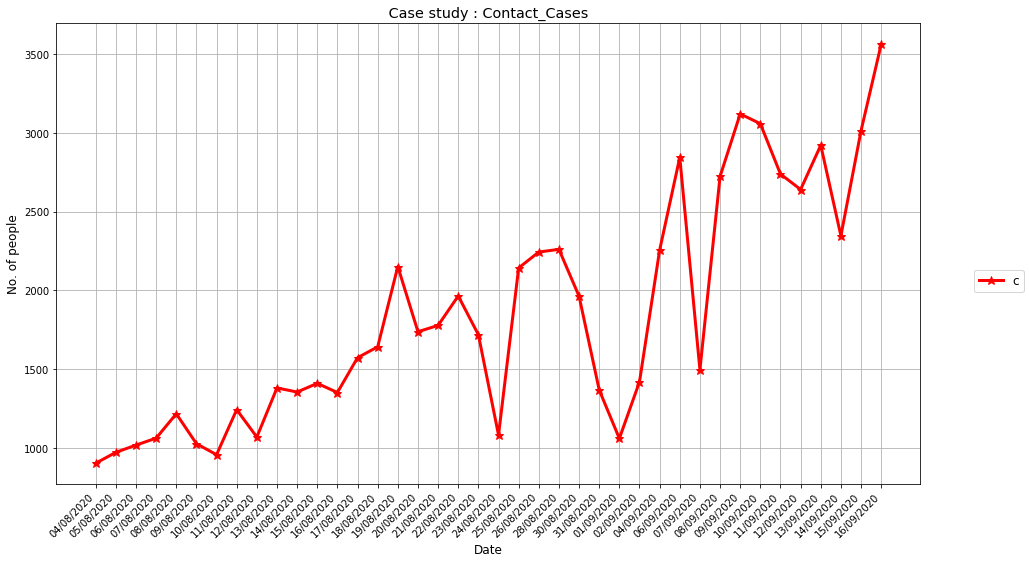

In [22]:
fig_contact = plt.figure(figsize=(15,8))
axes = fig_contact.add_axes([0.1,0.1,0.8,0.8])
axes.plot(data['date'],data['contact_cases'],'-r*',linewidth=3, markersize=9)
plt.xticks(rotation=45,ha='right')
plt.xlabel('Date',fontsize='large')
plt.ylabel('No. of people',fontsize='large')
plt.title(' Case study : Contact_Cases ',fontsize='x-large')
plt.grid(True)
plt.figlegend(labels=('contact_cases'),loc='center right',fontsize='large')
fig_contact.savefig('reports/Contact_Cases.png')

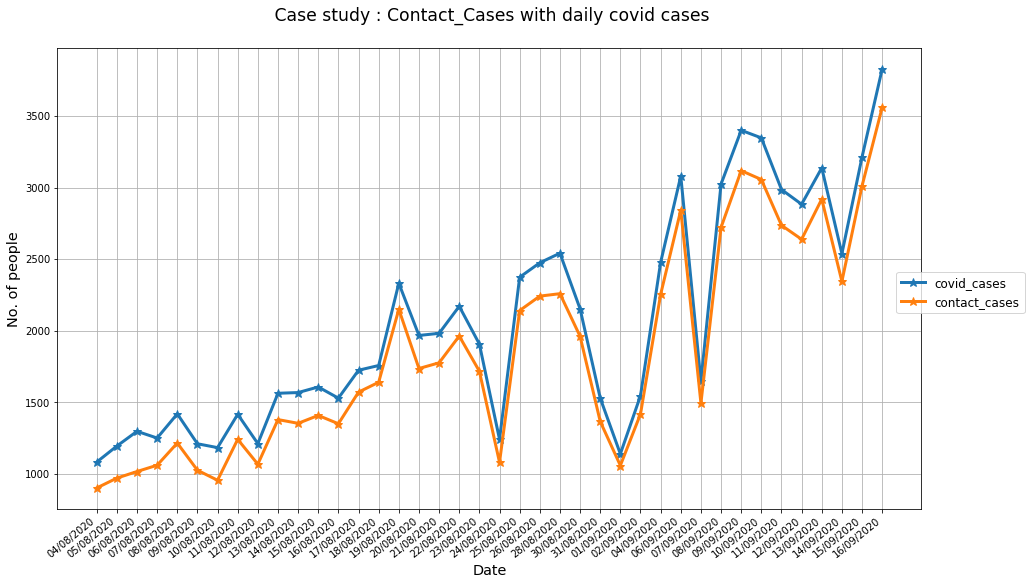

In [23]:

fig_contact2 = plt.figure(figsize=(15,8))
axes = fig_contact2.add_axes([0.1,0.1,0.8,0.8])
axes.plot(data['date'],data[['covid_cases','contact_cases']],'-*',linewidth=3, markersize=9)
plt.xticks(rotation=39,ha='right')
plt.xlabel('Date',fontsize='x-large')
plt.ylabel('No. of people',fontsize='x-large')
plt.title(' Case study : Contact_Cases with daily covid cases\n ',fontsize='xx-large')
plt.grid(True)
plt.figlegend(labels=('covid_cases','contact_cases'),loc='center right',fontsize='large')
fig_contact2.savefig('reports/Contact_Cases_wrt_covidcases.png')

In [61]:
# sample = data.dropna()
# l1 = sample['Total_Active_Cases']
# l2 = sample['contact_cases']
# l3 = sample['unknown_sources']
# l4 = sample['patients_relieved']

In [22]:
# list1 = np.array([l2,l3,l4])
# sample.columns